In [1]:
!pip install swifter
!pip install Sastrawi

     |████████████████████████████████| 633 kB 902 kB/s 
     |████████████████████████████████| 579 kB 7.2 MB/s 
     |████████████████████████████████| 9.9 MB 12.8 MB/s 
     |████████████████████████████████| 48.5 MB 47.7 MB/s 
     |████████████████████████████████| 17.2 MB 54.7 MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-py3-none-any.whl size=13976 sha256=2704ce978440a6bc256f52cc8f763ec9678ee134e643149d8f02bf58838692f9
  Stored in directory: /root/.cache/pip/wheels/49/44/5b/2c3fcb044734cb9969adbeeab8de419e571fb3d9d0b9f62dae
Successfully built swifter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.2
    Uninstalling pandas-1.2.2:
      Successfully uninstalled pandas-1.2.2
  Attempting uninstall: ray
    Found existing installation: ray 1.2.0
    Uninstalling ray-1.2.0:
      Successfully uninstalled ray-1.2.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 3.0.0
    Uninstalling pyarrow-3.0.0:
      Successfully un

In [2]:
# matplot
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [5]:
#sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

In [6]:
#util
import re
import string
from collections import Counter
import re
import pickle
import numpy as np
import pandas as pd

In [7]:
#importing the dataset
DATASET_COLUMNS  = ["kategori","text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('../input/ppkm-micro/datasetppkmmikro.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [8]:
decode_map = {0: "NEGATIVE", 1: "POSITIVE" , 2:"NEUTRAL" }
def decode_sentiment(label):
    return decode_map[int(label)]

In [9]:
dataset.kategori = dataset.kategori.apply(lambda x: decode_sentiment(x))

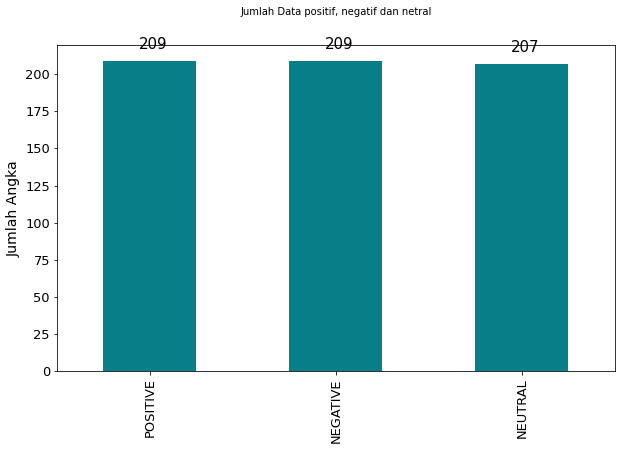

In [10]:
ax = dataset['kategori'].value_counts().plot(kind='bar', figsize=(10,6),fontsize=13,color='#087E88')
ax.set_title('Jumlah Data positif, negatif dan netral', size=10, pad=30)
ax.set_ylabel('Jumlah Angka', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 8, str(round(i.get_height(), 6)), fontsize=15)

In [11]:
#PRE-PROCESSING
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('\r',' ',text) # Remove every '\r'
    text = re.sub('@[^\s]+[ \t]','',text) # Remove every username
    text = re.sub(r'\brt\b', '',text).strip() # Remove retweet symbol
    text = re.sub('(?i)user','',text) # Remove every username
    text = re.sub('(?i)url',' ',text) # Remove every url
    text = re.sub(r'\\x..',' ',text) # Remove every emoji
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub(r'(\w)\1{2,}', r'\1\1', text) #Remove characters repeating more than twice 

    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_stopword(text):
    listStopword =  set(stopwords.words('indonesian'))
    removed = []
    for t in text:
        if t not in listStopword:
            removed.append(t)
    return text

def stemming(text):
    return stemmer.stem(text)

def remove_emoji(string): # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def preprocess(text):
    text = remove_unnecessary_char(text) # 1
    text = lowercase(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = stemming(text) # 4
    text = remove_emoji(text)
    text = remove_stopword(text) # 5
    return text

In [13]:
dataset['text'] = dataset['text'].apply(preprocess)

In [14]:
print("Shape: ", dataset.shape)
print (dataset.head())

Shape:  (625, 2)
   kategori                                               text
0  NEGATIVE  obat nganggur adalah kumpul dan obrol telah da...
1  NEGATIVE                          kerumun vaksinasinasional
2  NEGATIVE  langgarpsbb suka lihat rakyat jelata jaran reb...
3  NEGATIVE  langgarpsbb ngamuk telah cekcok kemudian ubah ...
4  NEGATIVE  pelanggarpsbb tidak guna masker di jl bedugul ...


In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'],dataset['kategori'],
                                                    test_size = 0.05, random_state = 10)

In [16]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=800000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  9551


In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [18]:
# Pemodelan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
KNN = KNeighborsClassifier(n_neighbors=1)
BNB = BernoulliNB()
LR = LogisticRegression()


In [20]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [21]:
KNN.fit(X_train,y_train)
y2_KNN_model = KNN.predict(X_test)
print("KNN Accuracy :", accuracy_score(y_test, y2_KNN_model))
print("")
model_Evaluate(KNN)

KNN Accuracy : 0.75

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.92      0.86        13
     NEUTRAL       0.71      0.56      0.63         9
    POSITIVE       0.70      0.70      0.70        10

    accuracy                           0.75        32
   macro avg       0.74      0.73      0.73        32
weighted avg       0.74      0.75      0.74        32



In [22]:
KNN.fit(X_train,y_train)
y_test_KNN_model = KNN.predict(X_test)
print("KNN Accuracy :", accuracy_score(y_test, y_test_KNN_model))

KNN Accuracy : 0.75


In [23]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.31      0.47        13
     NEUTRAL       0.32      0.67      0.43         9
    POSITIVE       0.67      0.60      0.63        10

    accuracy                           0.50        32
   macro avg       0.66      0.52      0.51        32
weighted avg       0.70      0.50      0.51        32



In [24]:
BNB.fit(X_train,y_train)
y_test_BNB_model = BNB.predict(X_test)
print("BNB Accuracy :", accuracy_score(y_test, y_test_BNB_model))

BNB Accuracy : 0.53125


In [25]:
LR.fit(X_train,y_train)
y_test_LR_model = LR.predict(X_test)

In [26]:
print("LR Accuracy :", accuracy_score(y_test, y_test_LR_model))

LR Accuracy : 0.6875


In [27]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

    NEGATIVE       0.81      1.00      0.90        13
     NEUTRAL       0.67      0.44      0.53         9
    POSITIVE       0.60      0.60      0.60        10

    accuracy                           0.72        32
   macro avg       0.69      0.68      0.68        32
weighted avg       0.71      0.72      0.70        32

